## Multilayer Perceptron Classifier
Rationale: The most typical MLP includes three layers: an input layer, a hidden layer and an output layer. The different layers of the MLP neural network are fully connected (full connection means: any neuron in the upper layer and all the neurons in the next layer). Neurons are connected)

ReLU is a relatively popular activation function recently. When the input signal is less than 0, the output is 0; when the input signal is greater than 0, the output is equal to the input; the specific activation function used depends on the specific situation.

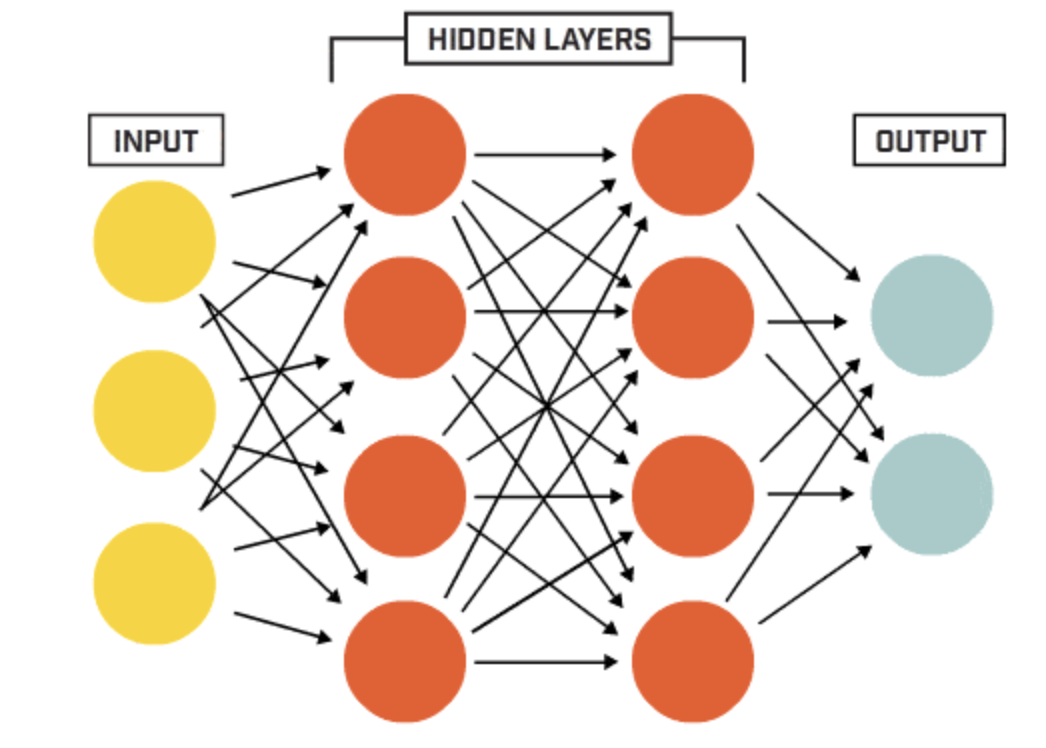

In [ ]:
from IPython.display import Image
Image(filename="MLP.png",width=500,height=300)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
df_ML = pd.read_csv('dataset_ML.csv')

In [ ]:
df_ml.head(5)

,Unnamed: 0,city_development_index,experience,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Phd,education_level_Undergraduate,cdi_bucket_medium_human_development,cdi_bucket_high_human_development,cdi_bucket_very_high_human_development,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Startup Company,company_type_Unknown,major_STEM
0,0,0.920,21,1,36,1.0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1
1,1,0.776,15,5,47,0.0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1
2,4,0.767,21,4,8,0.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,7,0.762,13,5,18,1.0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1
4,8,0.920,7,1,46,1.0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1


In [ ]:
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                  random_state=1)

In [ ]:
fit_MLP = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
fit_MLP.predict_proba(X_test[:1])

array([[0.03838405, 0.96161595]])

In [ ]:
fit_MLP.predict(X_test[:5, :])

array([1, 0, 1, 0, 1])

In [ ]:
fit_MLP.score(X_test, y_test)

0.88

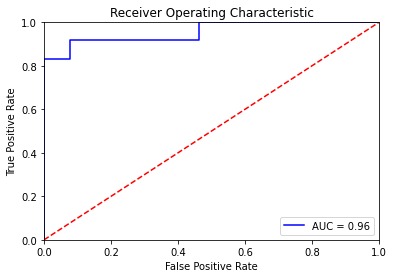

In [ ]:
# creating AUC/ROC graph
import sklearn.metrics as metrics
probs = fit_MLP.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd

In [21]:
df_ml = pd.read_csv('https://raw.githubusercontent.com/aashgohil/HR_Data_Science/main/dataset_ML.csv')

In [22]:
df_ml.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [23]:
df_ml.head()

,city_development_index,experience,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Phd,education_level_Undergraduate,cdi_bucket_medium_human_development,cdi_bucket_high_human_development,cdi_bucket_very_high_human_development,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Startup Company,company_type_Unknown,major_STEM
0,0.920,21,1,36,1.0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1
1,0.776,15,5,47,0.0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1
2,0.767,21,4,8,0.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,0.762,13,5,18,1.0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1
4,0.920,7,1,46,1.0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1


In [24]:
def auc_roc_graph(ytest,preds):# creating AUC/ROC graph
  ## Calculating metrics from ytest and predicted value
  fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
  roc_auc = metrics.auc(fpr, tpr)
  ## Plotting AUC-ROC
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [25]:
def train_and_predict(X_train_model, X_test_model, y_train_model, y_test_model, classifier):  ## Function takes in traintest split dataset and ML model - fits & predicts the model, calculates metrics
  ## Training the Model
  classifier.fit(X_train_model, y_train_model)

  ## Predicting the model
  y_model_tp = classifier.predict(X_test_model)

  ## Accuracy score
  a_score = metrics.accuracy_score(y_test_model, y_model_tp)
  print("The Accuracy is {}".format(a_score))

  ## Calculating sensitivity
  TP = sum((y_test_model == 1) & (y_model_tp == 1))
  p = sum((y_test_model == 1))
  TPR = TP/p
  print("The Sensitivity / True Positive Rate (TPR) is {}".format(TPR))

  ## Calculating Specifictiy
  N = sum(y_test_model == 0)
  TN = sum((y_test_model == 0) & (y_model_tp == 0))
  TNR = TN/N
  print("The Specifictiy / TNR  is {}".format(TNR))

  # calculate recall
  recall = metrics.recall_score(y_test_model, y_model_tp, average='binary')
  print('Recall: %.3f' % recall)

  # calculating precision
  precision = metrics.precision_score(y_test_model, y_model_tp, average='binary')
  print('Precision: {}'.format(precision))

  ## Calculating F1 score
  score = metrics.f1_score(y_test_model, y_model_tp, average='binary')
  print('F1-score: {}'.format(score))

  ##Printing the roc_auc
  auc_roc_graph(y_test_model,y_model_tp)

  return [a_score,TPR,TNR, recall, precision,score]

In [26]:
## Creating a train test split
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                  random_state=1)

In [27]:
## Instantiating the XGboost model

fit_MLP = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
fit_MLP.predict_proba(X_test[:1])

array([[0.03838405, 0.96161595]])

The Accuracy is 0.88
The Sensitivity / True Positive Rate (TPR) is 0.8333333333333334
The Specifictiy / TNR  is 0.9230769230769231
Recall: 0.833
Precision: 0.9090909090909091
F1-score: 0.8695652173913043


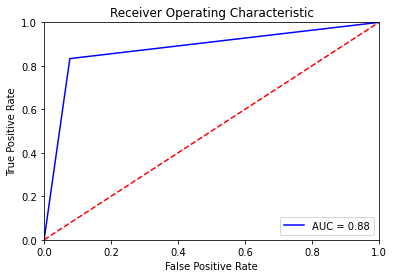

In [28]:
MLP_metrics = train_and_predict(X_train, X_test, y_train, y_test, fit_MLP)

In [37]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(solver="liblinear")
fit_log = model.fit(X_train, y_train)

The Accuracy is 0.92
The Sensitivity / True Positive Rate (TPR) is 0.8333333333333334
The Specifictiy / TNR  is 1.0
Recall: 0.833
Precision: 1.0
F1-score: 0.9090909090909091


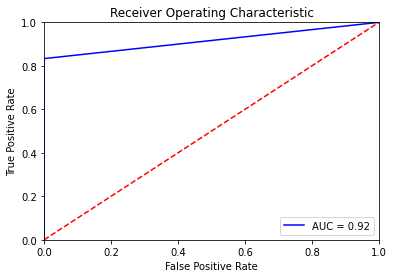

In [38]:
log_metrics = train_and_predict(X_train, X_test, y_train, y_test, fit_log)